# Jupyter notebooks features overview

Jupyter allows to create a formatted document containing text, equations, and code.

The document is split into cells. Cells can be of three types:

* Code
* Markdown (simple wiki markup language)
* Raw

This current cell is a markdown cell.

It is possible to use **bold**, *itallic*, and `verbatim`.

    This is some verbatim code.
    $ echo "helloworld"

In addition, it is possible, through Python, to add all sorts of contents (html, video, audio, ...) to the page. This notebook aims at demonstrating these possibilities through a number of practical examples.

Jupyter has two modes: command mode and edit mode. 
Press Enter for edit mode (after going over a cell (by clicking or by pressing up and down))
.. and edit the cell as you please
Press Esc to exit the edit mode and enter the command mode.

When you are in command mode, you can use the following shortcuts:
A: Insert cell above
B: Insert cell below
D (double press): Delete cell
Z: Undo cell deletion
Y: Change cell to Code
M: Change cell to Markdown
Shift + M: Merge selected cell

When you are either command or edit mode you can press
Shift + Enter to run cell and move to next (you will use this a lot)

## Numerical cells and plots

Jupyter let's you import easily all the numpy and matplotlib libraries and use them 'Matlab' style.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib`inline` option let's you plot things in the notebook directly.

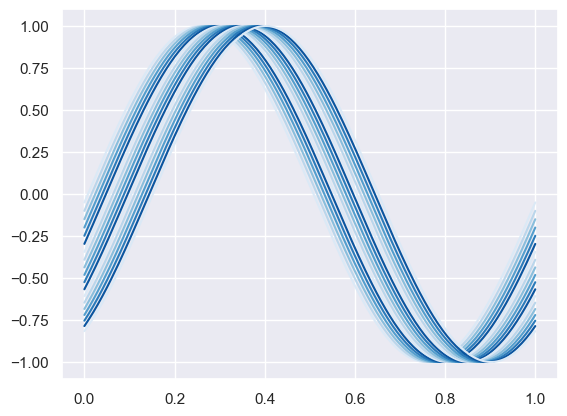

In [29]:
t = np.linspace(0,1,200)
for i in range(1,20):
    plt.plot(t, np.sin(2*np.pi*t-t[10*i]))

In [30]:
np.pi*2

6.283185307179586

It is possible to give this plot **XKCD** style! (XKCD is a serial webcomic)

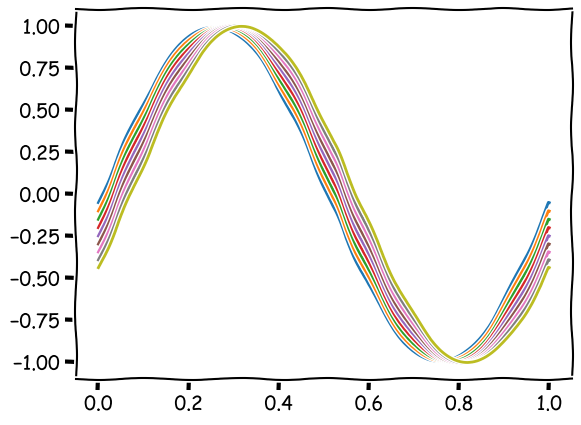

In [4]:
# Running this in a 'with' allows the style to be temporary
with plt.xkcd():
    for i in range(1,10):
        plt.plot(t, np.sin(2*np.pi*t-t[10*i]))

## Magic
Magic commands are special commands prefixed with % (line magics) or %% (cell magics).
They provide useful shortcuts for common tasks like timing, debugging, running external scripts, etc.
Many [IPython magics](http://ipython.readthedocs.org/en/stable/interactive/magics.html) can be used in JupyterLab. They can be listed using the `%lsmagic` magic.

In [7]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

Use the `%timeit` magic to compare the runtime of two pieces of code. For example, let's compare a pure Python recursive implementation of the factorial to an implementation using numpy vector routines.

In [8]:
# recursive implementation
def factorial_1(n):
    if n > 1:
        return n*factorial_1(n-1)
    else:
        return 1
    
# numpy implementation
def factorial_2(n):
    return np.prod(np.arange(1,n+1))

In [9]:
%timeit factorial_1(100)

16.6 µs ± 515 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [10]:
%timeit factorial_2(100)

5.61 µs ± 126 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Use %run to run another Python file

In [25]:
%run helpers/hello.py

Hello world!


## Equations

Jupyter notebooks allow to display equations just by typing in latex. For example, we can write the famous Fourier transform equation as
$$
\int_{-\infty}^\infty f(t) e^{-i\omega t} dt.
$$

It is also possible to add some math in text, for example  a linear system $Ax = b$.

## Images

It is possible to include images in the notebooks, either by adding the HTML tags directly in a markdown cell such as the following:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Skyline_of_Edinburgh.jpg/1920px-Skyline_of_Edinburgh.jpg" width=800>

or by using an IPython widget.

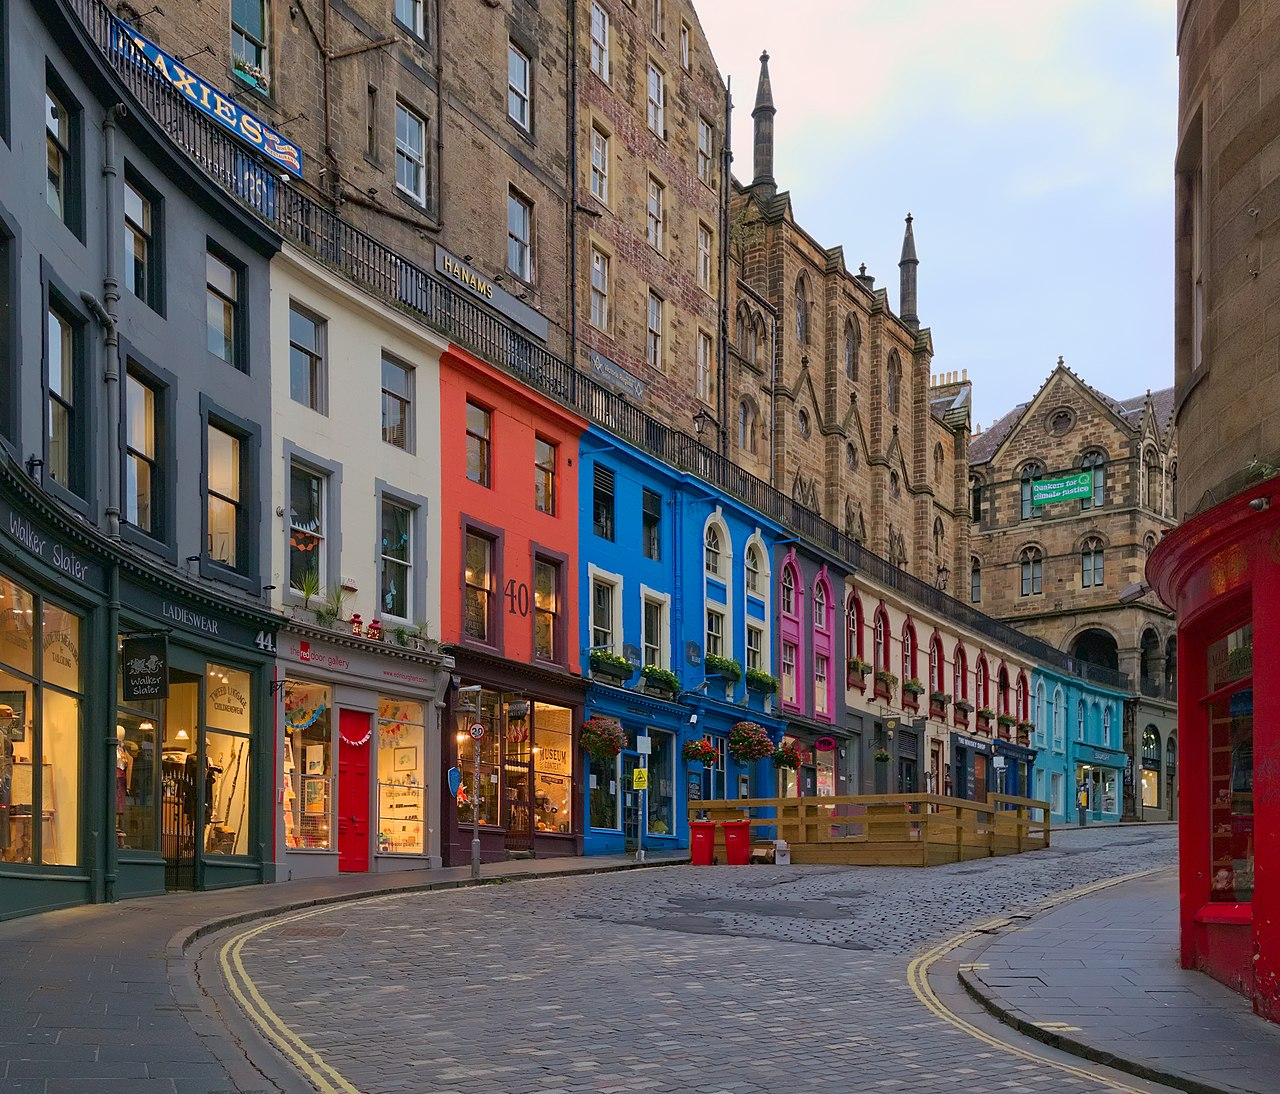

In [11]:
from IPython.display import Image
Image('./data/diagonalley.jpg', width=400,height=300)

## Videos

Videos can be embedded in the notebook. For example, here is a YouTube video.

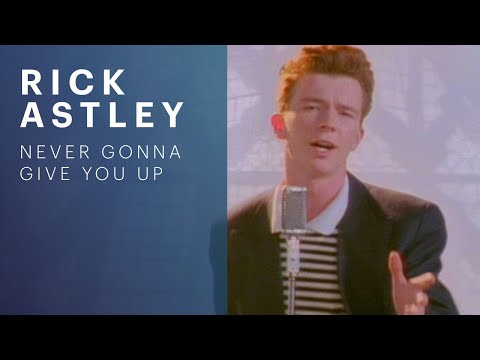

In [12]:
from IPython.display import YouTubeVideo
from datetime import timedelta

# It is possible to start the video at a specific time
start=int(timedelta(hours=0, minutes=0, seconds=0).total_seconds())

YouTubeVideo("dQw4w9WgXcQ", start=start, autoplay=0, theme="light", color="red")

## Interactive Widgets

Jupyter also allows to create interactive widgets to easily visualize graphs with varying parameters. Unfortunately, the widgets are not preserved when you export to html, but you can embed them in html (see Widgets > Embed). 

In [19]:
from ipywidgets import interact

# We need to define a function that takes as arguments the parameters
# we would like to play with.
def plot_norm(mean=0,sd=5):
    plt.hist(np.random.normal(mean,sd,100000),bins=100)
    plt.xlim((-15,15))
    plt.title("Normal")

# Now we only need to call the interact function
# keyword arguments are used to give the parameter ranges
interact(plot_norm, mean=(-5,5,10), sd=(0,30,5))

interactive(children=(IntSlider(value=0, description='mean', max=5, min=-5, step=10), IntSlider(value=5, descr…

<function __main__.plot_norm(mean=0, sd=5)>

## Interactive plots with Bokeh

Until now, all the plots we have shown were not interactive, that is, it was not possible to zoom into some part of the graph or moves things around. [Bokeh](http://bokeh.pydata.org) is a Python module that allows just to do that. In style!

In [7]:
from bokeh.plotting import figure, show, output_notebook
output_notebook()

Loading BokehJS ...

In [8]:
N = 500

x = np.linspace(-10, 10, N)
y = np.linspace(-10, 10, N)
xx, yy = np.meshgrid(x, y)
# d = np.sin(xx)*np.cos(yy)
d = (xx**2 + yy**2)**0.7 - 4.*np.sin(2*xx) - 1.8*np.cos(2*yy)

p = figure(x_range=[-10, 10], y_range=[-10, 10])
p.image(image=[d], x=[-10], y=[-10], dw=[20], dh=[20], palette="Spectral11")

show(p)

## Magnificient plots with Seaborn

[Seaborn](http://stanford.edu/~mwaskom/software/seaborn/index.html) is a Python package that wraps around matplotlib and makes the plots look extremely nice. It adds nice default colormaps and has integrated options for fancy plots.

It is not installed by default with Anaconda, so to obtain it type the following in a terminal:

    conda install seaborn
        
To demonstrate it, we have collected tweets containing the following keywords:

* reproducible research
* ipython notebook
* open access
* open science
* open data
* bigdata
* epfl

This example was mostly taken from this [tutorial](http://adilmoujahid.com/posts/2014/07/twitter-analytics/).

To activate seaborn, simply import it. It is possible to set a default palette.

In [20]:
import seaborn as sns

# set the default color palette
# try other options: 'Blues', sns.cubehelix_palette(8)
sns.set_palette('Blues')

# Seaborn can also use a context for different purpose
# possible values are paper, notebook, talk, and poster
sns.set_context("notebook")

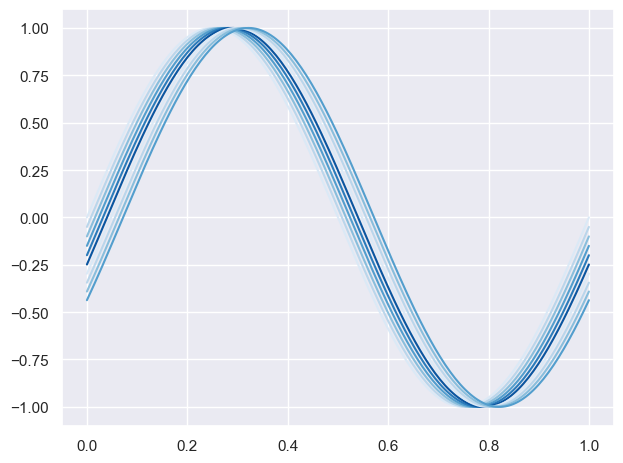

In [21]:
# try to plot our boring old sine curves
for i in range(0,10):
    plt.plot(t, np.sin(2*np.pi*t-t[10*i]))
plt.tight_layout()

## Conclusion

IPython offers great tools both for computional experiments and to share these experiments in a visually enticing way.

The notebook format can be shared as is to allow someone else to play with the data, or it can be converted to a format that allow for displaying such as HTML, LaTeX, PDF, etc. To do so, use the `ipython nbconvert` utility in the terminal.

## Exercises

* Consider the first plot we saw (below). Add a title, labels to the axes, add another function plot with a different color and add a legend for both. See [this gallery of examples for inspiration](https://matplotlib.org/gallery.html). 

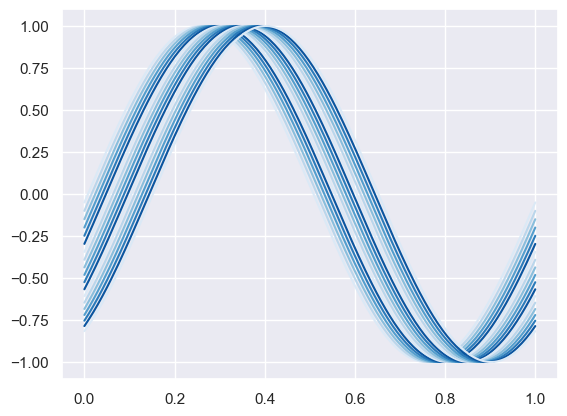

In [22]:
t = np.linspace(0,1,200)
for i in range(1,20):
    plt.plot(t, np.sin(2*np.pi*t-t[10*i]))

* Recover the normal distribution interactive widget we saw before. Add an extra feature allowing the user to skew the distribution making it fatter on a side (e.g. the right side). Take a look at [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html), it might help.

In [23]:
from ipywidgets import interact

# Start by fattening the function distribution here
def plot_norm(mean=0,sd=5):
    plt.hist(np.random.normal(mean,sd,100000),bins=100)
    plt.xlim((-15,15))
    plt.title("Normal")

# Add a new parameter to control the fatness of the distribution side
interact(plot_norm, mean=(-5,5,10), sd=(0,30,5))

interactive(children=(IntSlider(value=0, description='mean', max=5, min=-5, step=10), IntSlider(value=5, descr…

<function __main__.plot_norm(mean=0, sd=5)>